<a href="https://colab.research.google.com/github/rupalsagrawal/ransac/blob/master/ransac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RANSAC ALGORITHM**

Importing libraries

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import sys
 

Returns the slope and intercept of line between two randomly selected poits

In [ ]:
def find_line_model(points):
#finds a line model for given points ,takes parameter points seected for model,returns the slope and intercept of line model 
 m=(points[1,1]-points[0,1])/(points[1,0]-points[0,0]+sys.float_info.epsilon)
 c=points[1,1]-m*points[1,0]
 return m,c


Finds the nearest point betwwen data point and line model.The distance between this two point will decide wheher a point is an ilier or outlier 

In [ ]:
def find_intercept_point(m,c,x0,y0):
  '''finds an intercept point of the line model with a normal from point x0,y0
  to it. return intercept point'''
  #intersection point with the model
  x=(x0+m*y0-m*c)/(1+m**2)
  y=(m*x0+(m**2)*c)/(1+m**2)+c
  return x,y
  

Plots the model at each iteration

In [ ]:
def ransac_plot(n, x, y, m, c, final=False, x_in=(), y_in=(), points=()):
    """ plot the current RANSAC step
    :param n      iteration
    :param points picked up points for modeling
    :param x      samples x
    :param y      samples y
    :param m      slope of the line model
    :param c      shift of the line model
    :param x_in   inliers x
    :param y_in   inliers y
    :points       two random points selected for model
    """
 
    #fname = "output/figure_" + str(n) + ".png"
    line_width = 1.
    line_color = '#0080ff'
    title = 'iteration ' + str(n)
 
    if final:
        #fname = "output/final.png"
        line_width = 3.
        line_color = '#ff0000'
        title = 'final solution'
 
    plt.figure("Ransac", figsize=(15., 15.))
     

 
    # plot input points
    plt.plot(x[:,0], y[:,0], marker='o', label='Input points', color='#00cc00', linestyle='None', alpha=0.4)
 
    # draw the current model
    plt.plot(x, m*x + c, 'r', label='Line model', color=line_color, linewidth=line_width)
 
    # draw inliers
    if not final:
        plt.plot(x_in, y_in, marker='o', label='Inliers', linestyle='None', color='#ff0000', alpha=0.6)
 
    # draw points picked up for the modeling
    if not final:
        plt.plot(points[:,0], points[:,1], marker='o', label='Picked points', color='#0000cc', linestyle='None', alpha=0.6)
 
    plt.title(title)
    plt.legend()
    #plt.savefig(fname)
    plt.show()

DEFINING RANSAC PARAMETERS AND CREATING DATA FOR RUNNING RANSAC ALGORITHM 

In [ ]:

  #ransac parameters
  ransac_iterations=20 #number of iterations
  ransac_threshold=3 #threshold

  #ratio of inliers required to assert that amodel fits well to the data
  ransac_ratio=0.6

  # generate sparse input data
  n_samples=500 # number of input points
  outliers_ratio=0.4 #ratio of outliers

  n_inputs=1
  n_outputs=1
  #generate samples
  x=(30*np.random.random((n_samples,n_inputs)))
  #print(x)
  #print("tue")
  # generate line's slope()
  perfect_fit=0.5*np.random.normal(size=(n_inputs,n_outputs))
  #print(perfect_fit)
  y=scipy.dot(x,perfect_fit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead


Since all practical data is like gaussian distribution.We add gaussian noise to the data.Also,adding some outlier points to the data

In [ ]:
x_noise=x+np.random.normal(size=x.shape)
y_noise=y+np.random.normal(size=y.shape)
n_outliers=int(outliers_ratio*n_samples)
#print(n_outliers)
indices=np.arange(x_noise.shape[0])

#print(indices)
np.random.shuffle(indices)
outlier_indices=indices[:n_outliers]
#print(outlier_indices)
x_noise[outlier_indices]=30*np.random.random(size=(n_outliers,n_inputs))
y_noise[outlier_indices]=30*np.random.normal(size=(n_outliers,n_outputs))
#print(x_noise)




Performing iterations on the data

inlier ratio=%f 0.294
model_m=%f 0.4728171326361608
model_c=%f 4.290190250893057


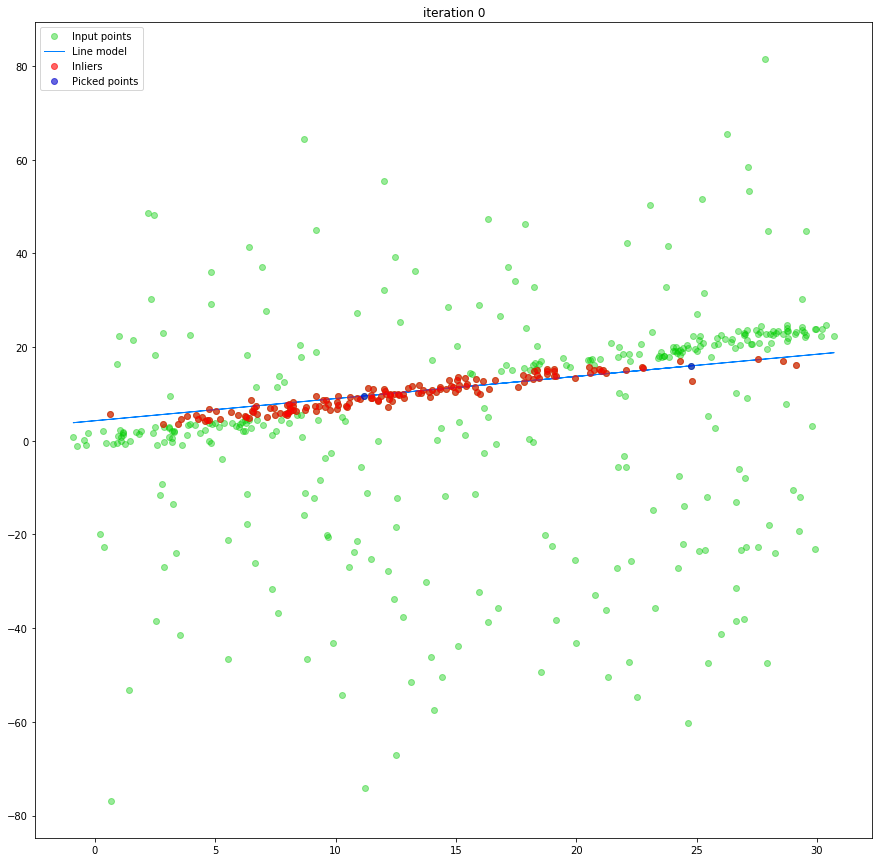

inlier ratio=%f 0.294
model_m=%f 0.4728171326361608
model_c=%f 4.290190250893057


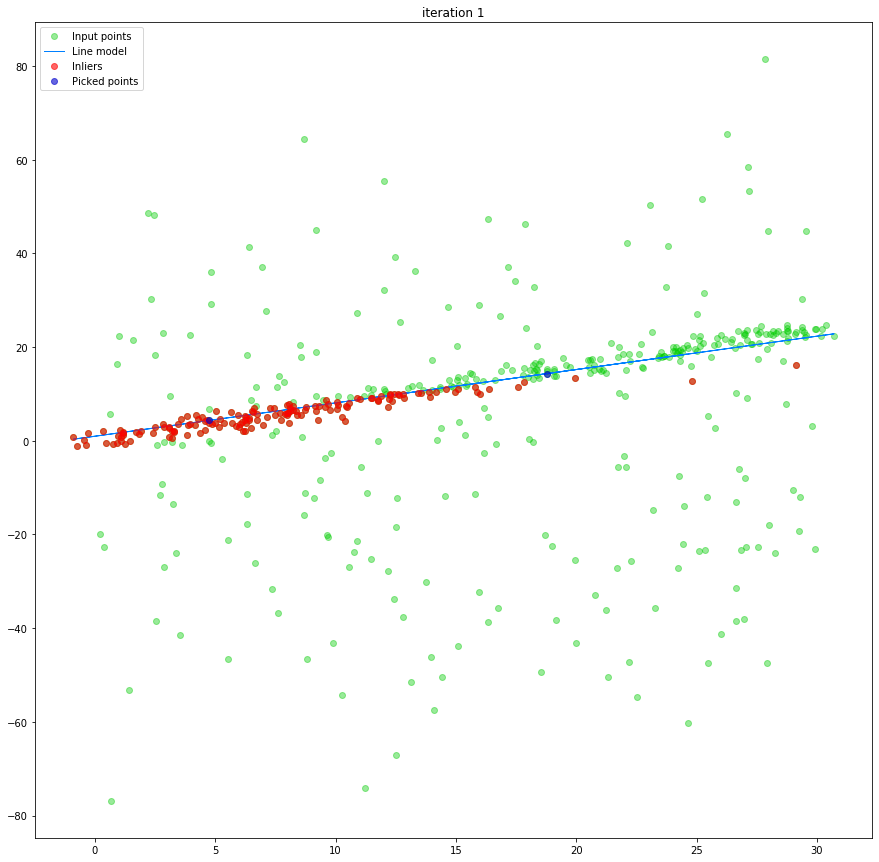

inlier ratio=%f 0.002
model_m=%f 0.4728171326361608
model_c=%f 4.290190250893057


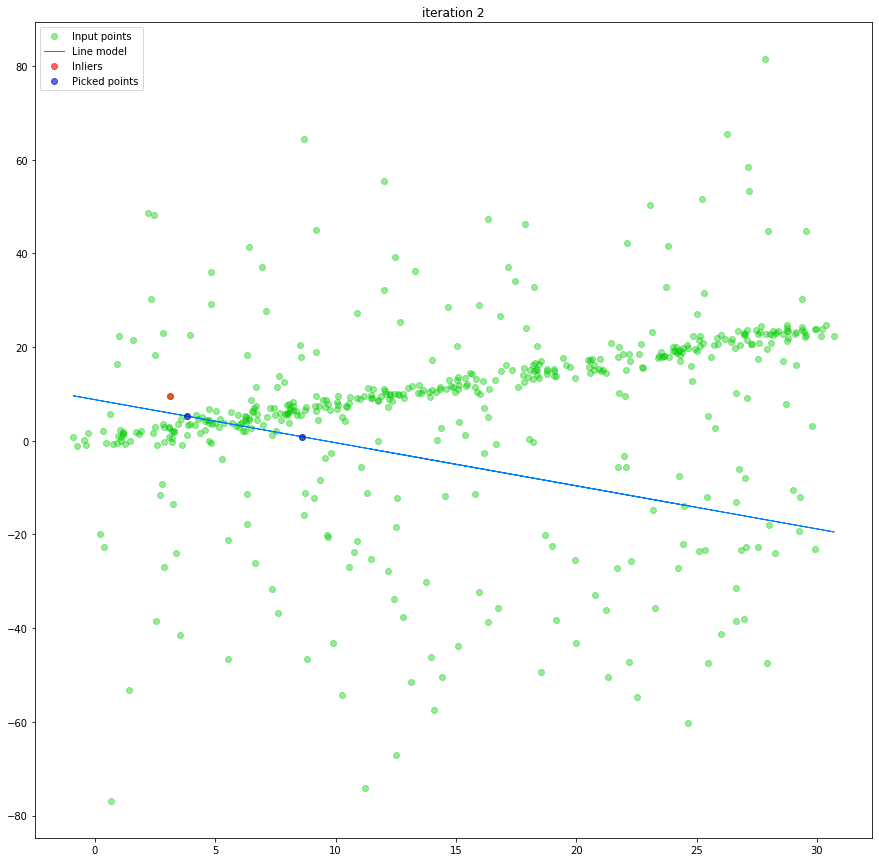

inlier ratio=%f 0.13
model_m=%f 0.4728171326361608
model_c=%f 4.290190250893057


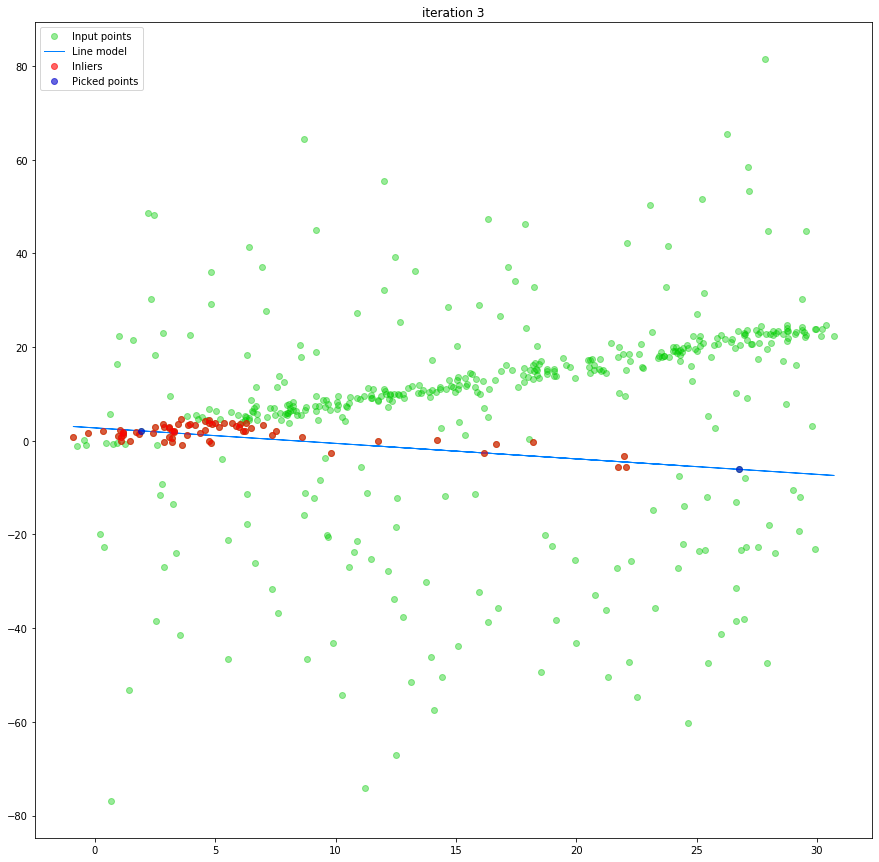

inlier ratio=%f 0.0
model_m=%f 0.4728171326361608
model_c=%f 4.290190250893057


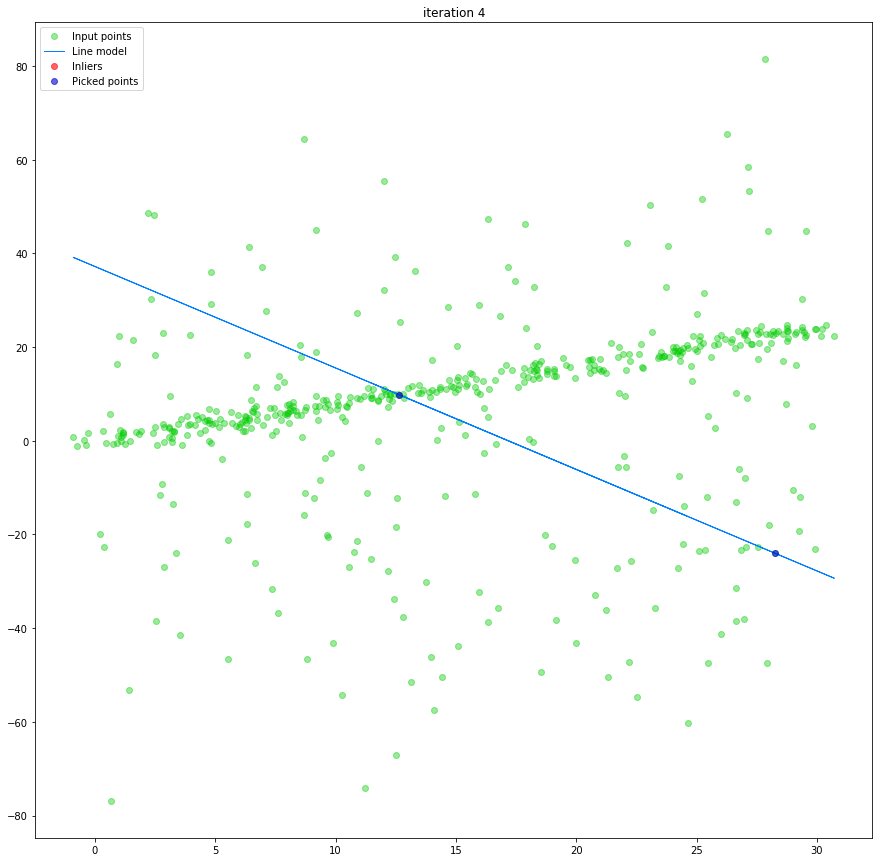

inlier ratio=%f 0.32
model_m=%f 0.7630475350179333
model_c=%f 1.2811962763925067


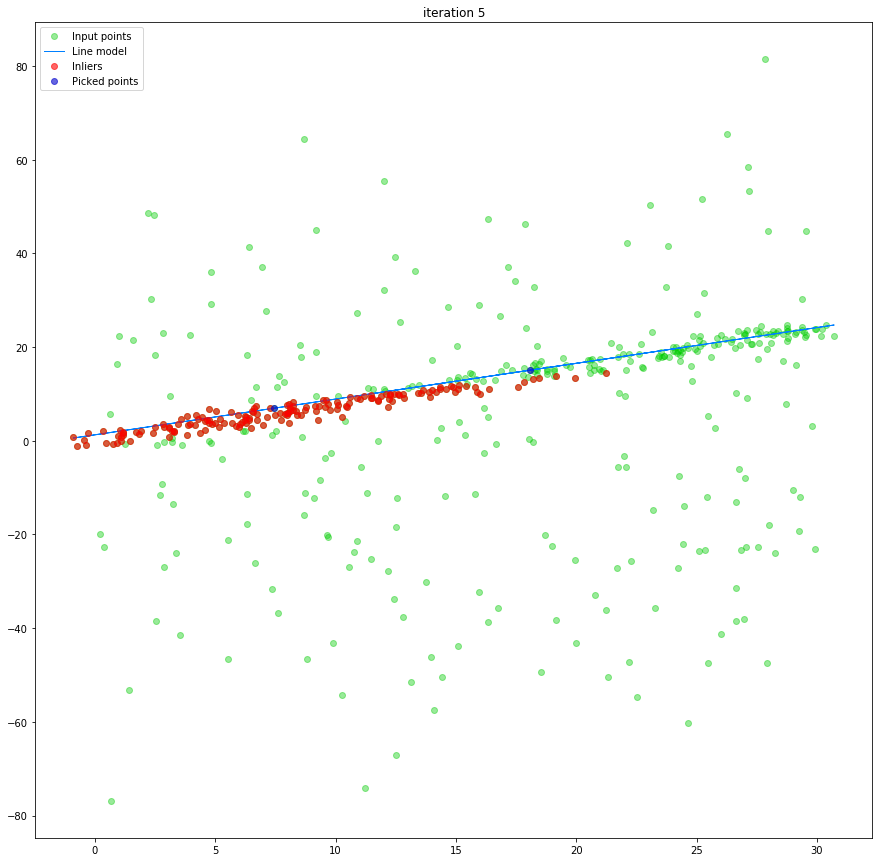

inlier ratio=%f 0.0
model_m=%f 0.7630475350179333
model_c=%f 1.2811962763925067


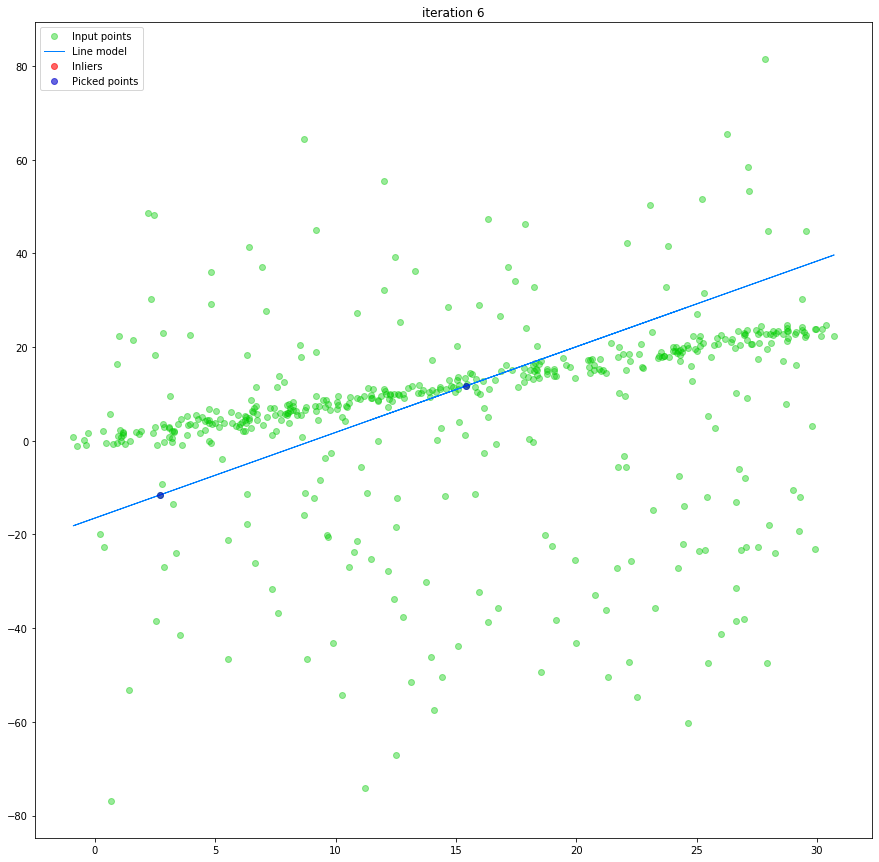

inlier ratio=%f 0.0
model_m=%f 0.7630475350179333
model_c=%f 1.2811962763925067


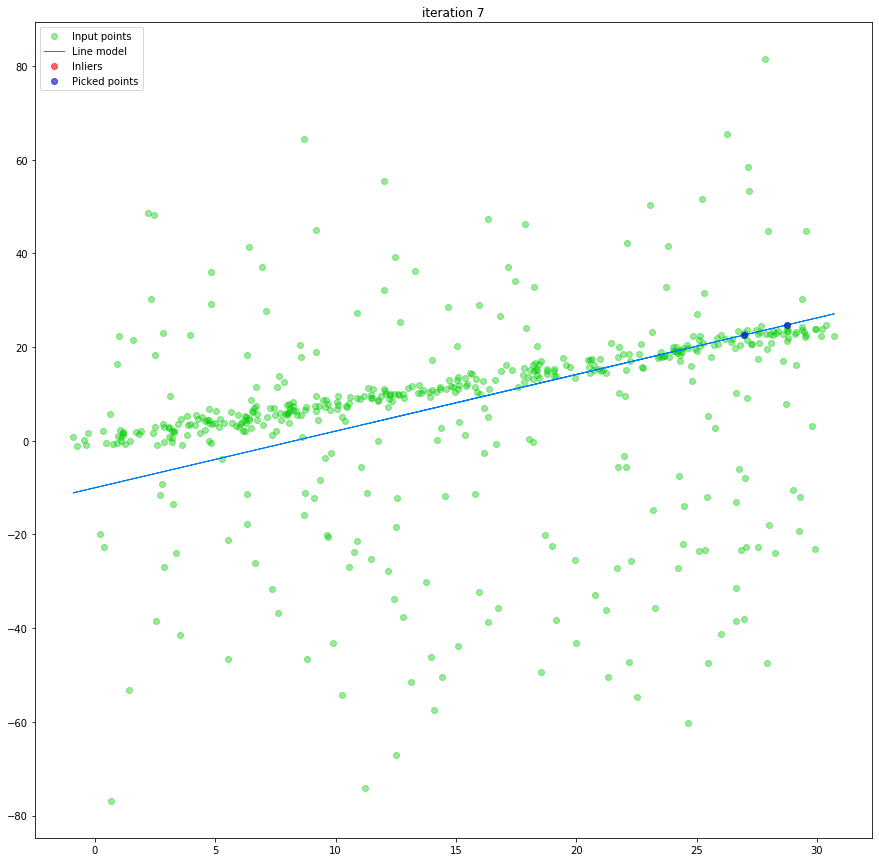

inlier ratio=%f 0.0
model_m=%f 0.7630475350179333
model_c=%f 1.2811962763925067


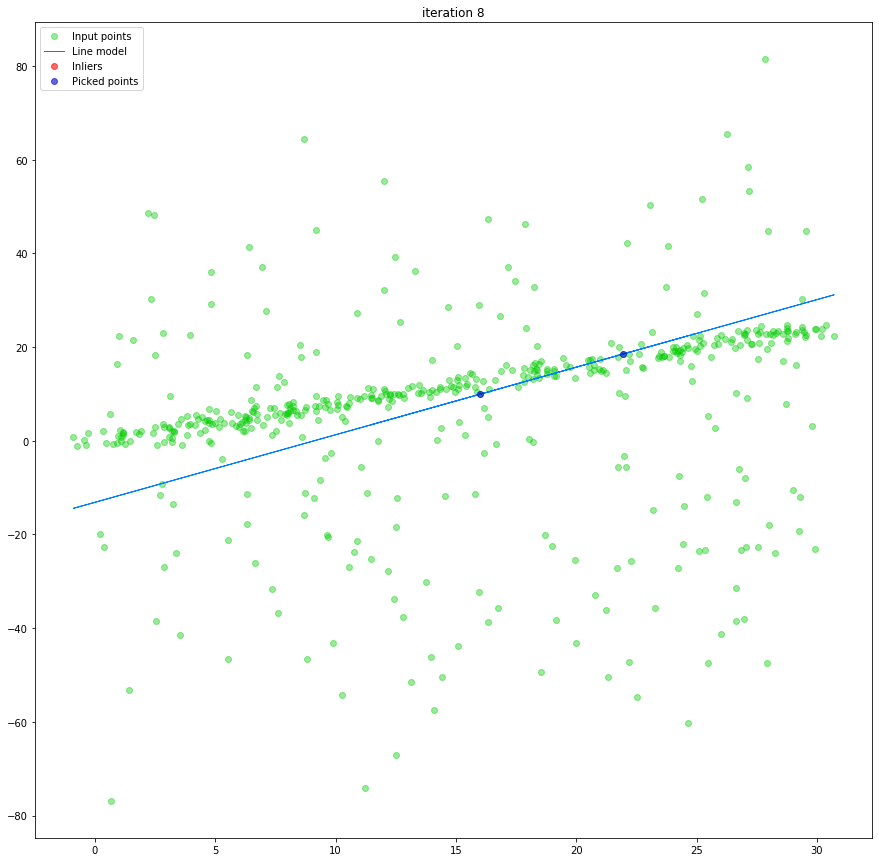

inlier ratio=%f 0.348
model_m=%f 0.7157833387629672
model_c=%f 2.1387749851965046


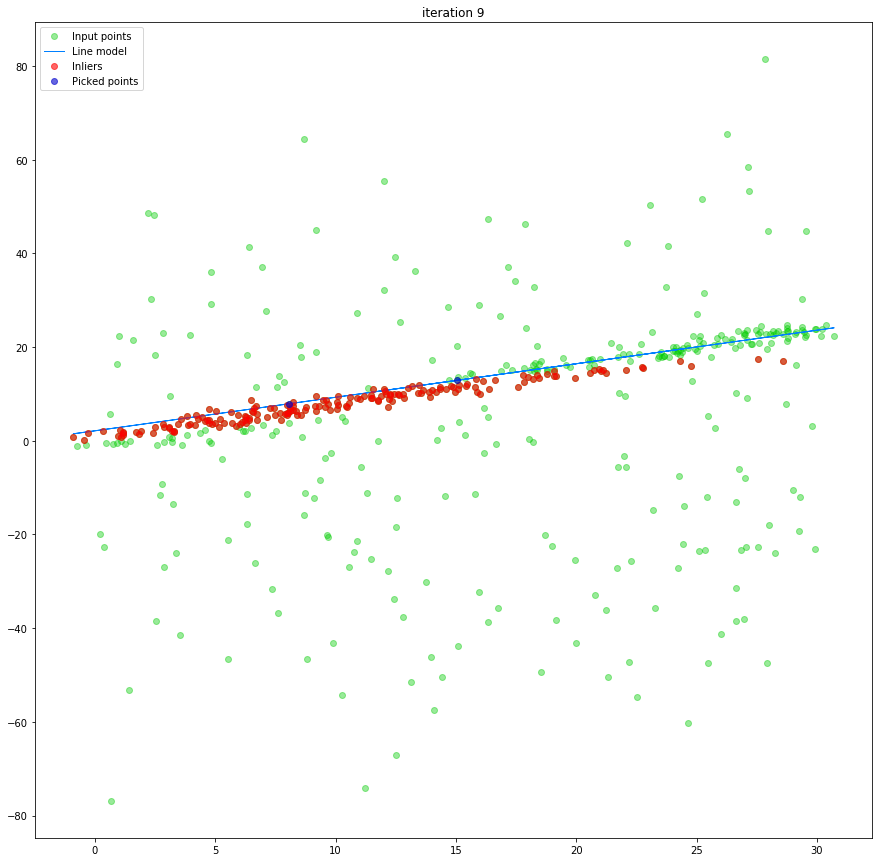

inlier ratio=%f 0.002
model_m=%f 0.7157833387629672
model_c=%f 2.1387749851965046


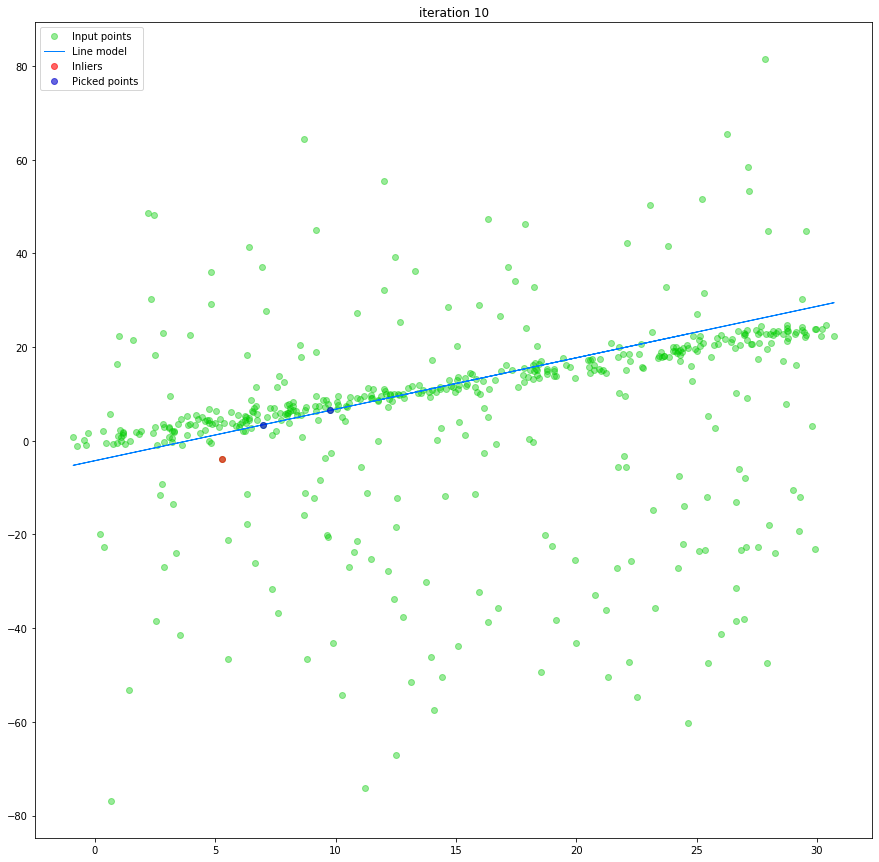

inlier ratio=%f 0.352
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


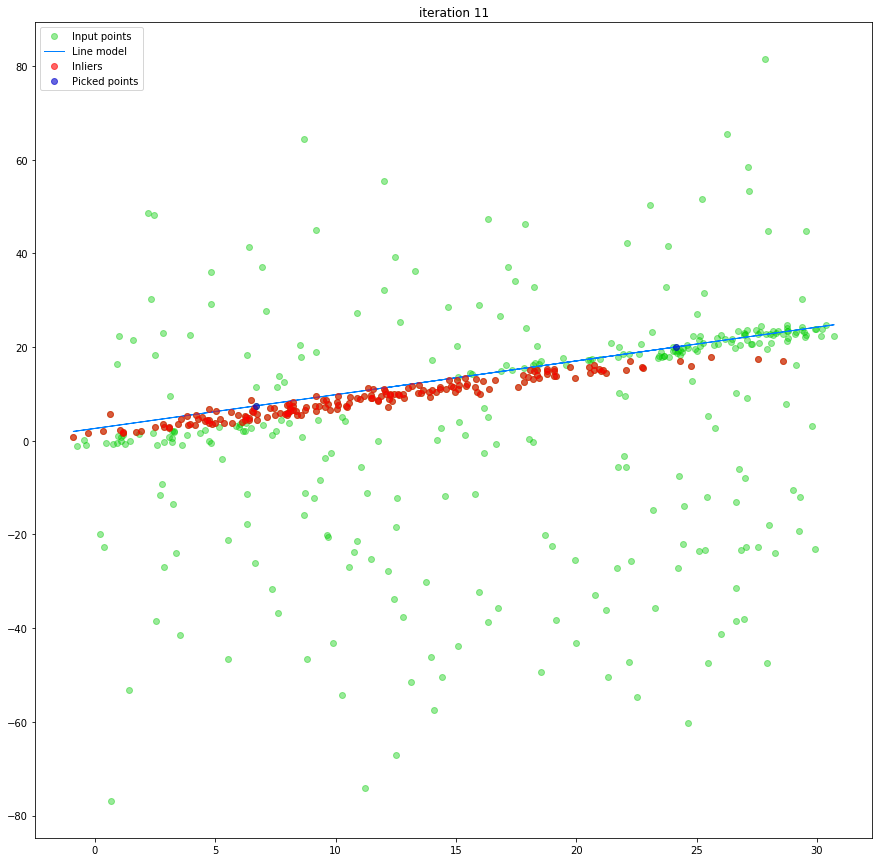

inlier ratio=%f 0.102
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


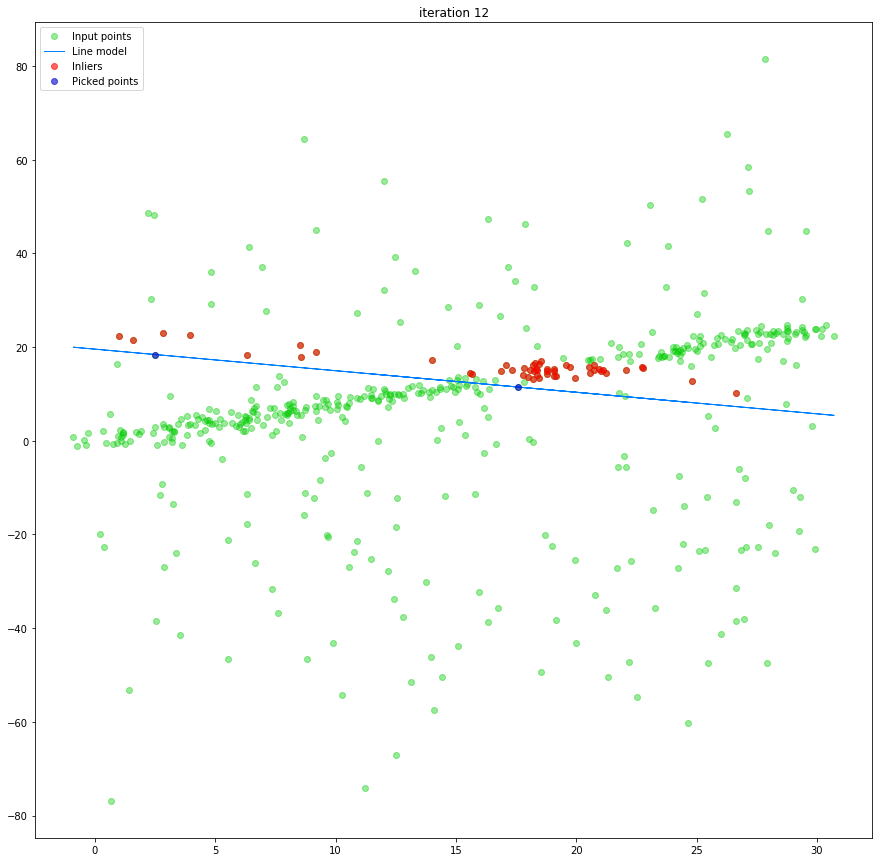

inlier ratio=%f 0.0
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


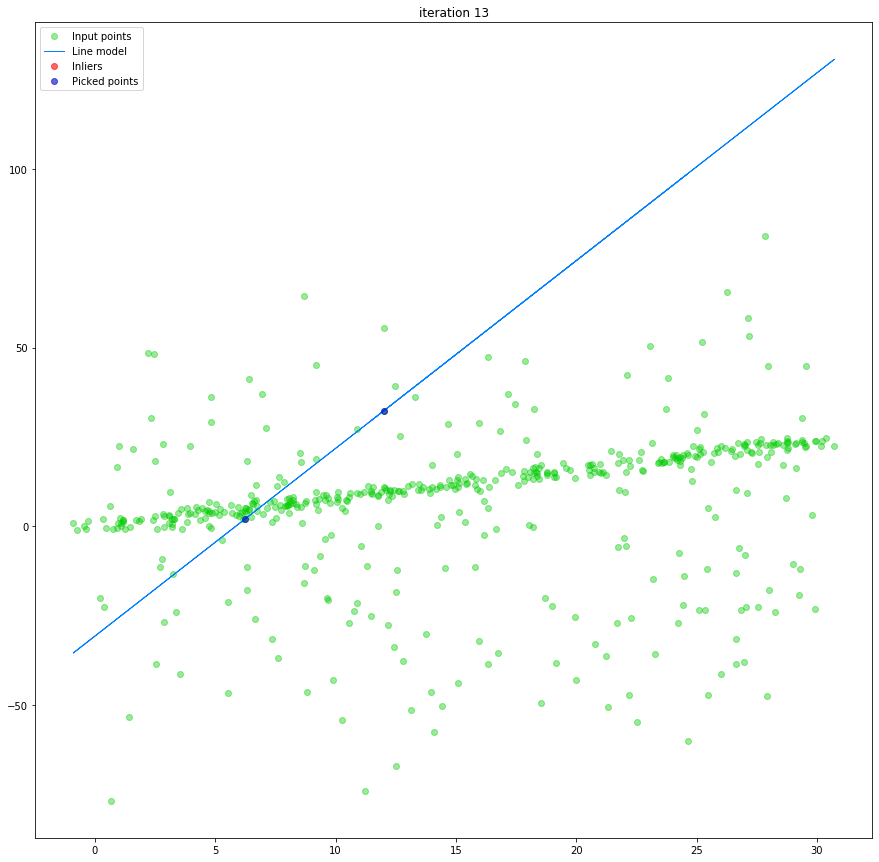

inlier ratio=%f 0.0
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


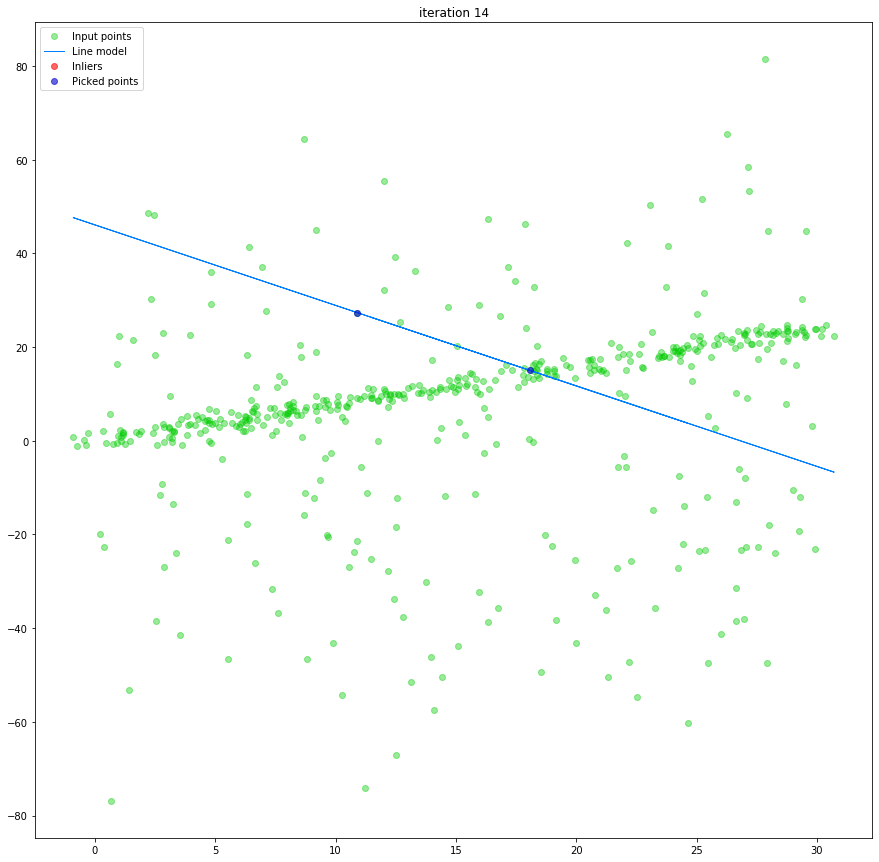

inlier ratio=%f 0.218
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


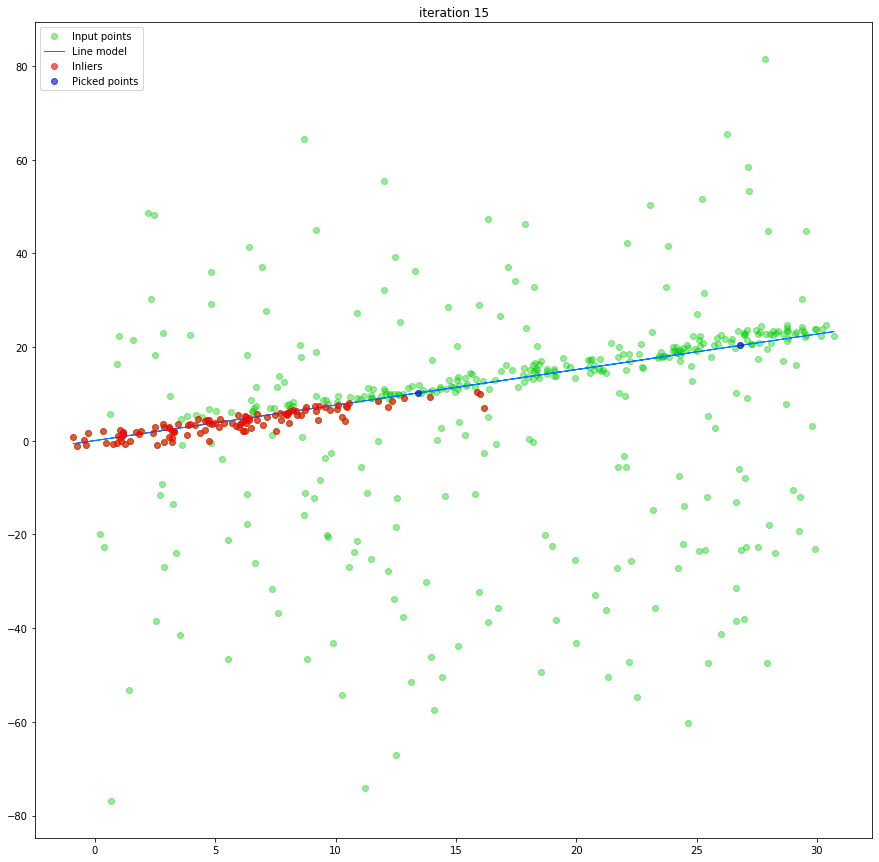

inlier ratio=%f 0.226
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


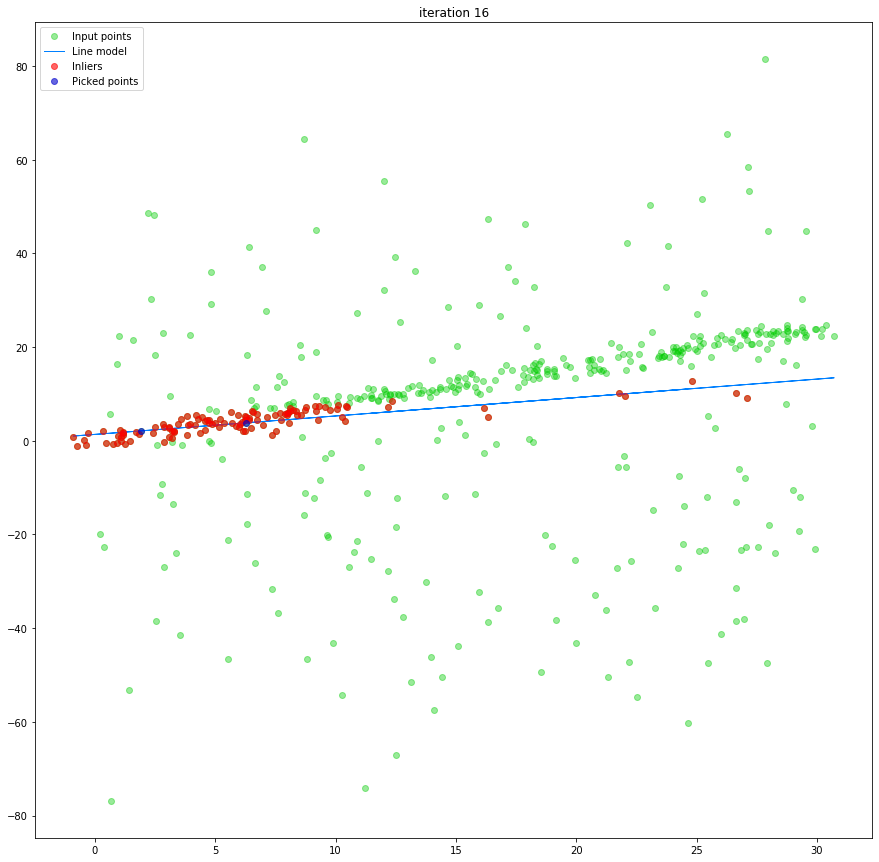

inlier ratio=%f 0.224
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


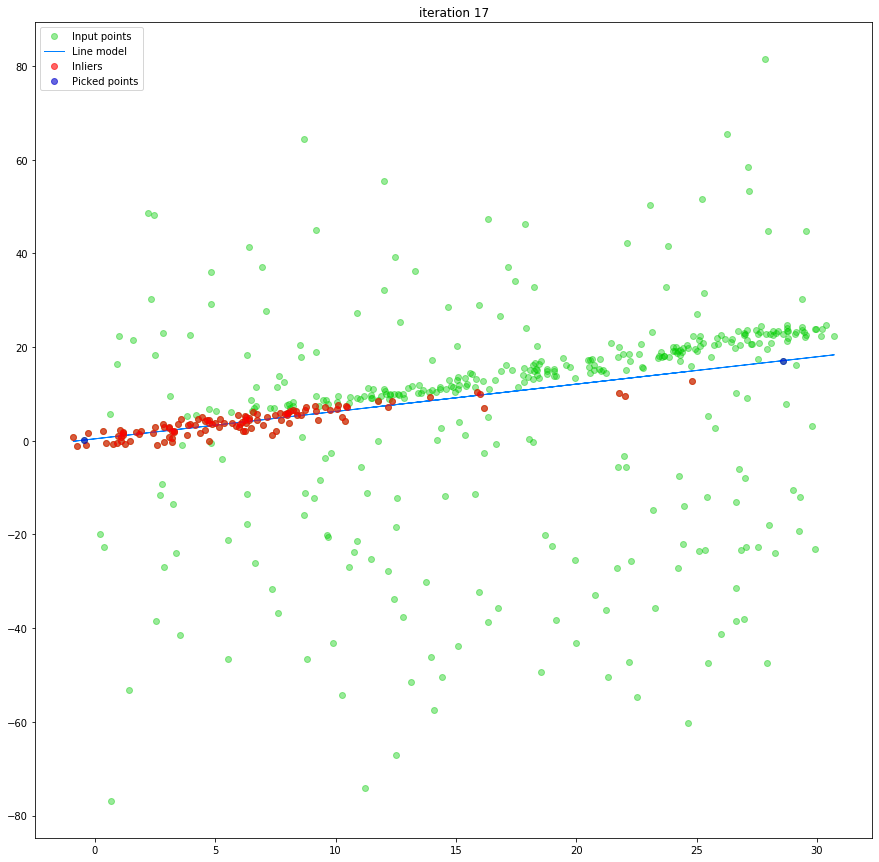

inlier ratio=%f 0.31
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


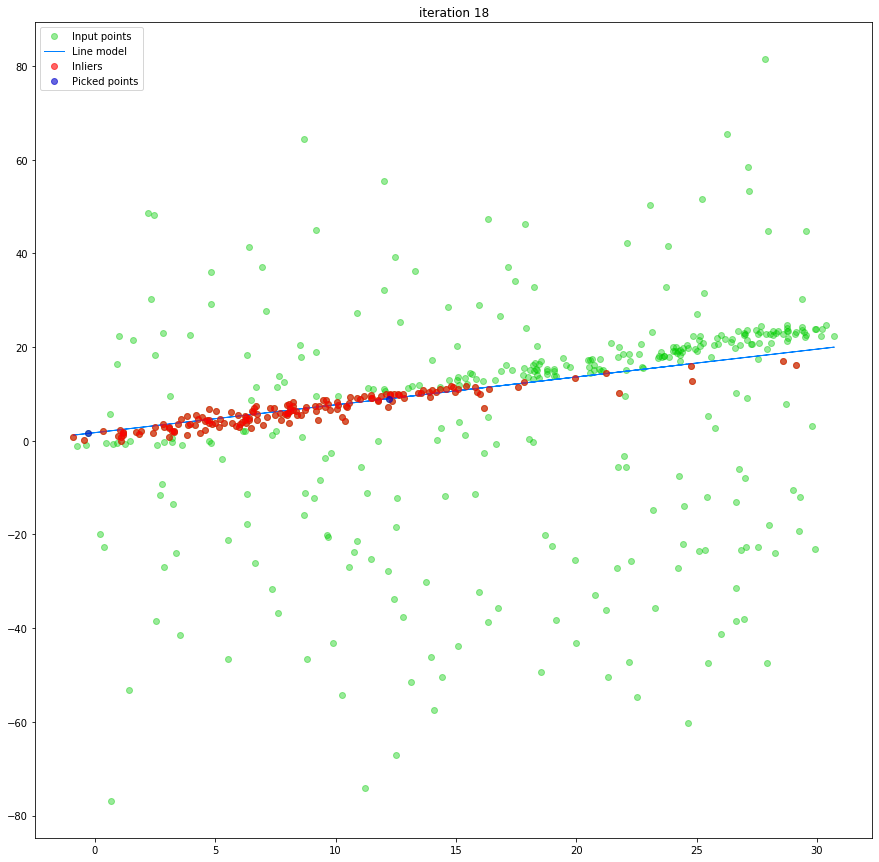

inlier ratio=%f 0.008
model_m=%f 0.7204887578219036
model_c=%f 2.6426885314627704


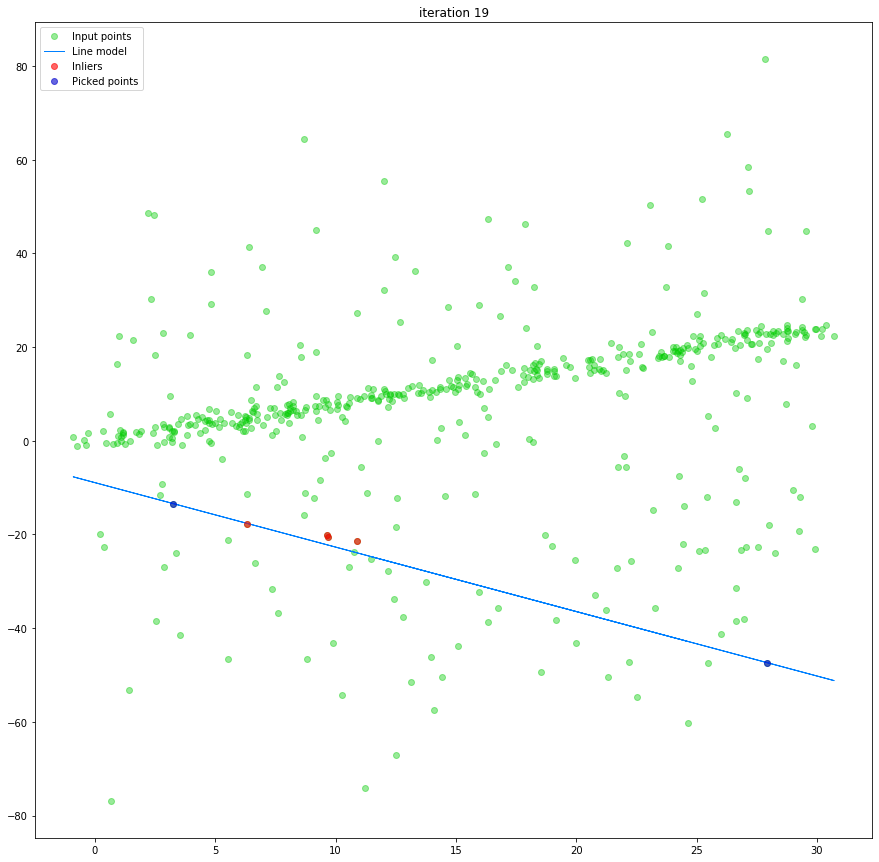

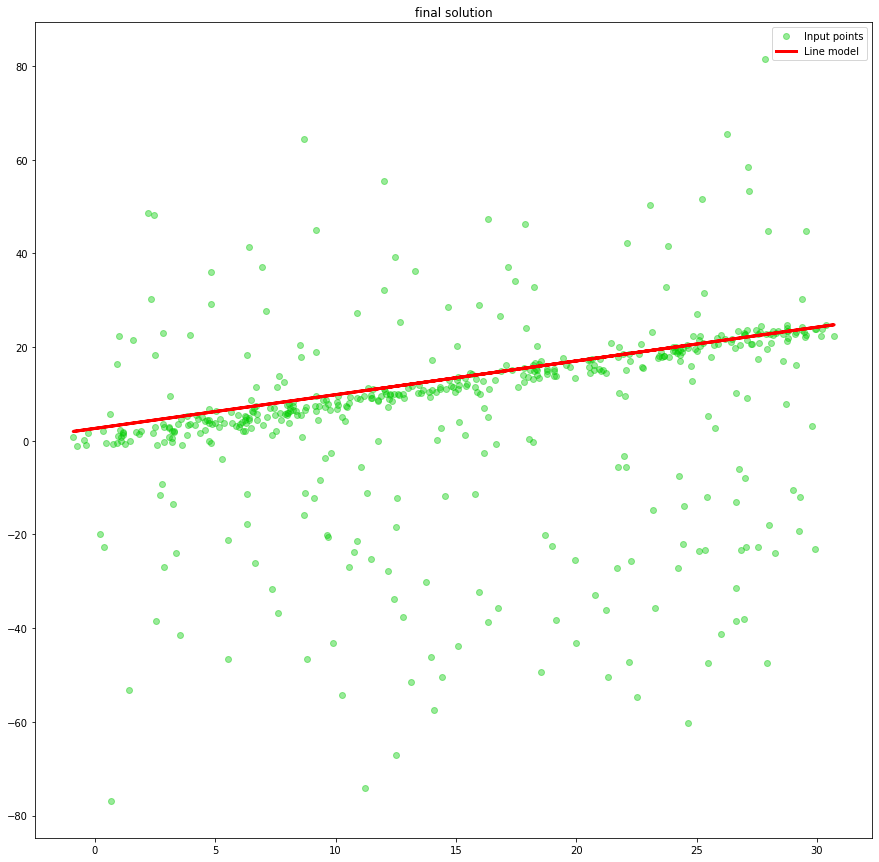


 Final model:

 ratio=%f 0.352
 model_m=%f 0.7204887578219036
 model_c=%f 2.6426885314627704


In [ ]:
data=np.hstack((x_noise,y_noise))
ratio=0
model_m=0
model_c=0
#perform ransac iterations
for it in range(ransac_iterations):
  #picking up two random points
  n=2
  all_indices=np.arange(x_noise.shape[0])
  np.random.shuffle(all_indices)

  indices_1=all_indices[:n]
  indices_2=all_indices[n:]
  #print(indices_1)
  #print(indices_2)
  #break
  maybe_points=data[indices_1,:]
  test_points=data[indices_2,:]
  #find a line model for these points
  m,c=find_line_model(maybe_points)
  x_list=[]
  y_list=[]
  num=0

  for ind in range(test_points.shape[0]):
    x0=test_points[ind,0]
    y0=test_points[ind,1]
    # find an intercept point of the model with a normal from point(x0,y0)
    x1,y1=find_intercept_point(m,c,x0,y0)
    #distance from point to the model 
    dist=math.sqrt((x1-x0)**2+(y1-y0)**2)
    #check whether its an inlier or not
    if(dist<ransac_threshold):
      x_list.append(x0)
      y_list.append(y0)
      num+=1
  x_inliers=np.array(x_list)
  y_inliers=np.array(y_list)
  # in case a new model is betrer -cache it
  if num/float(n_samples)>ratio:
    ratio=num/float(n_samples)
    model_m=m
    model_c=c
  print('inlier ratio=%f',num/float(n_samples)) 
  print('model_m=%f',model_m)
  print('model_c=%f',model_c)
  #plot the current step
  ransac_plot(it,x_noise,y_noise,m,c,False,x_inliers,y_inliers,maybe_points)
  if num>n_samples*ransac_ratio:
    print('The model is found!') 
    break

#plot the final model
ransac_plot(0,x_noise,y_noise,model_m,model_c,True)
print ('\n Final model:\n')
print (' ratio=%f',ratio)
print (' model_m=%f',model_m)
print(' model_c=%f',model_c)    